# Pandas - Python Data Analysis Library

# Case Study 1: Analysis India's COVID pandemic data using DataFrames

# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import geopandas as gpd
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import datetime

# Collection of Data

# Web Scraping

In [2]:
url = 'https://www.mohfw.gov.in/'
web_content = requests.get(url).content
soup = BeautifulSoup(web_content, "html.parser")
extract_contents = lambda row: [x.text.replace('\n', '') for x in row]
stats = [] 
all_rows = soup.find_all('tr')
for row in all_rows:
    stat = extract_contents(row.find_all('td')) 
    if len(stat) == 6:
        stats.append(stat)
new_cols = ["Sr.No", "States/UT",'Active Cases','Recovered',"Deceased","Confirmed"]
state_data = pd.DataFrame(data = stats, columns = new_cols)


In [3]:
state_data

,Sr.No,States/UT,Active Cases,Recovered,Deceased,Confirmed
0,1,Andaman and Nicobar Islands,0,33,0,33
1,2,Andhra Pradesh,1220,2289,60,3569
2,3,Arunachal Pradesh,3,1,0,4
3,4,Assam,1018,163,4,1185
4,5,Bihar,1998,1618,20,3636
5,6,Chandigarh,96,189,4,289
6,7,Chhattisgarh,344,102,1,447
7,8,Dadar Nagar Haveli,2,0,0,2
8,9,Delhi,10058,8075,416,18549
9,10,Goa,29,41,0,70


In [4]:
state_data.drop(index=[35,36],inplace=True)

In [5]:
state_data

,Sr.No,States/UT,Active Cases,Recovered,Deceased,Confirmed
0,1,Andaman and Nicobar Islands,0,33,0,33
1,2,Andhra Pradesh,1220,2289,60,3569
2,3,Arunachal Pradesh,3,1,0,4
3,4,Assam,1018,163,4,1185
4,5,Bihar,1998,1618,20,3636
5,6,Chandigarh,96,189,4,289
6,7,Chhattisgarh,344,102,1,447
7,8,Dadar Nagar Haveli,2,0,0,2
8,9,Delhi,10058,8075,416,18549
9,10,Goa,29,41,0,70


In [6]:
type(state_data)

pandas.core.frame.DataFrame

# Introduction to the DataSet

In [7]:
state_data.head(3)

,Sr.No,States/UT,Active Cases,Recovered,Deceased,Confirmed
0,1,Andaman and Nicobar Islands,0,33,0,33
1,2,Andhra Pradesh,1220,2289,60,3569
2,3,Arunachal Pradesh,3,1,0,4


In [8]:
state_data.tail(1)

,Sr.No,States/UT,Active Cases,Recovered,Deceased,Confirmed
34,35,West Bengal,2851,1970,309,5130


# EDA

In [9]:
state_data

,Sr.No,States/UT,Active Cases,Recovered,Deceased,Confirmed
0,1,Andaman and Nicobar Islands,0,33,0,33
1,2,Andhra Pradesh,1220,2289,60,3569
2,3,Arunachal Pradesh,3,1,0,4
3,4,Assam,1018,163,4,1185
4,5,Bihar,1998,1618,20,3636
5,6,Chandigarh,96,189,4,289
6,7,Chhattisgarh,344,102,1,447
7,8,Dadar Nagar Haveli,2,0,0,2
8,9,Delhi,10058,8075,416,18549
9,10,Goa,29,41,0,70


In [10]:
dfc=state_data.copy()

In [11]:
dfc.head()

,Sr.No,States/UT,Active Cases,Recovered,Deceased,Confirmed
0,1,Andaman and Nicobar Islands,0,33,0,33
1,2,Andhra Pradesh,1220,2289,60,3569
2,3,Arunachal Pradesh,3,1,0,4
3,4,Assam,1018,163,4,1185
4,5,Bihar,1998,1618,20,3636


In [12]:
state_data.columns

Index(['Sr.No', 'States/UT', 'Active Cases', 'Recovered', 'Deceased',
       'Confirmed'],
      dtype='object')

# Check Datatypes and Convert, if required

In [13]:
print('States/UT',type(state_data['States/UT'][0]))
print('Active Cases:',type(state_data['Active Cases'][0]))
print('Total Confirmed Cases:',type(state_data['Confirmed'][0]))
print('Recovered:',type(state_data['Recovered'][0]))
print('Deceased:',type(state_data['Deceased'][0]))

States/UT <class 'str'>
Active Cases: <class 'str'>
Total Confirmed Cases: <class 'str'>
Recovered: <class 'str'>
Deceased: <class 'str'>


In [14]:
state_data['Active Cases']=state_data['Active Cases'].map(int)
state_data['Recovered']=state_data['Recovered'].map(int)
state_data['Deceased']=state_data['Deceased'].map(int)
state_data['Confirmed']=state_data['Confirmed'].map(int)

In [15]:
print('States/UT',type(state_data['States/UT'][0]))
print('Active Cases:',type(state_data['Active Cases'][0]))
print('Confirmed:',type(state_data['Confirmed'][0]))
print('Recovered:',type(state_data['Recovered'][0]))
print('Deceased:',type(state_data['Deceased'][0]))

States/UT <class 'str'>
Active Cases: <class 'numpy.int64'>
Confirmed: <class 'numpy.int64'>
Recovered: <class 'numpy.int64'>
Deceased: <class 'numpy.int64'>


In [16]:
state_data.shape

(35, 6)

In [17]:
state_data.size

210

# Check for null values

In [18]:
#Check for null values
state_data.apply(lambda x: x.isna().sum())

Sr.No           0
States/UT       0
Active Cases    0
Recovered       0
Deceased        0
Confirmed       0
dtype: int64

In [19]:
state_data.apply(lambda x: x.isna().sum()).sum()

0

In [20]:
state_data.isna().values.any()

False

# More Information on DataFrame

In [21]:
state_data.dtypes

Sr.No           object
States/UT       object
Active Cases     int64
Recovered        int64
Deceased         int64
Confirmed        int64
dtype: object

In [22]:
state_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sr.No         35 non-null     object
 1   States/UT     35 non-null     object
 2   Active Cases  35 non-null     int64 
 3   Recovered     35 non-null     int64 
 4   Deceased      35 non-null     int64 
 5   Confirmed     35 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 3.2+ KB


# Describe()

In [23]:
state_data.describe()

,Active Cases,Recovered,Deceased,Confirmed
count,35.00000,35.000000,35.000000,35.000000
mean,2414.40000,2485.257143,147.542857,5047.200000
std,6139.97764,5316.146373,405.258621,11752.203538
min,0.00000,0.000000,0.000000,1.000000
25%,36.50000,37.000000,0.000000,66.000000
50%,624.00000,256.000000,5.000000,1185.000000
75%,1937.50000,1968.500000,68.500000,3602.500000
max,34890.00000,28081.000000,2197.000000,65168.000000


In [24]:
state_data.describe().loc['count']

Active Cases    35.0
Recovered       35.0
Deceased        35.0
Confirmed       35.0
Name: count, dtype: float64

In [25]:
state_data.describe().loc['max']

Active Cases    34890.0
Recovered       28081.0
Deceased         2197.0
Confirmed       65168.0
Name: max, dtype: float64

In [26]:
state_data[state_data['Active Cases']==state_data.describe().loc['max'][0]]

,Sr.No,States/UT,Active Cases,Recovered,Deceased,Confirmed
19,20,Maharashtra,34890,28081,2197,65168


In [27]:
state_data[state_data['Active Cases']==state_data.describe().loc['max'][0]]['States/UT']

19    Maharashtra
Name: States/UT, dtype: object

In [28]:
state_data[state_data['Active Cases']==state_data.describe().loc['min'][0]][['States/UT','Active Cases']]

,States/UT,Active Cases
0,Andaman and Nicobar Islands,0
22,Mizoram,0


In [29]:
state_data[state_data['Active Cases']==state_data.describe().loc['min'][0]]['States/UT']

0     Andaman and Nicobar Islands
22                        Mizoram
Name: States/UT, dtype: object

In [30]:
lis = list(state_data[state_data['Active Cases']==state_data.describe().loc['min'][0]]['States/UT'])

In [31]:
lis

['Andaman and Nicobar Islands', 'Mizoram']

In [32]:
state_data[state_data['Active Cases']>state_data.describe().loc['mean'][0]]['States/UT']

8              Delhi
10           Gujarat
18    Madhya Pradesh
19       Maharashtra
27         Rajasthan
29        Tamil Nadu
33     Uttar Pradesh
34       West Bengal
Name: States/UT, dtype: object

In [33]:
state_data[state_data['Active Cases']>state_data.describe().loc['mean'][0]]['States/UT']

8              Delhi
10           Gujarat
18    Madhya Pradesh
19       Maharashtra
27         Rajasthan
29        Tamil Nadu
33     Uttar Pradesh
34       West Bengal
Name: States/UT, dtype: object

In [34]:
state_data

,Sr.No,States/UT,Active Cases,Recovered,Deceased,Confirmed
0,1,Andaman and Nicobar Islands,0,33,0,33
1,2,Andhra Pradesh,1220,2289,60,3569
2,3,Arunachal Pradesh,3,1,0,4
3,4,Assam,1018,163,4,1185
4,5,Bihar,1998,1618,20,3636
5,6,Chandigarh,96,189,4,289
6,7,Chhattisgarh,344,102,1,447
7,8,Dadar Nagar Haveli,2,0,0,2
8,9,Delhi,10058,8075,416,18549
9,10,Goa,29,41,0,70


In [35]:
dfc.Confirmed.dtype

dtype('O')

In [36]:
state_data['Confirmed'].dtype

dtype('int64')

# Feature Engineering

In [37]:
state_data

,Sr.No,States/UT,Active Cases,Recovered,Deceased,Confirmed
0,1,Andaman and Nicobar Islands,0,33,0,33
1,2,Andhra Pradesh,1220,2289,60,3569
2,3,Arunachal Pradesh,3,1,0,4
3,4,Assam,1018,163,4,1185
4,5,Bihar,1998,1618,20,3636
5,6,Chandigarh,96,189,4,289
6,7,Chhattisgarh,344,102,1,447
7,8,Dadar Nagar Haveli,2,0,0,2
8,9,Delhi,10058,8075,416,18549
9,10,Goa,29,41,0,70


In [38]:
df=state_data.copy()

Add 
1. Active Cases
2. Recovery Rate
3. Fatality Rate wrt State
4. Fatality Rate wrt Country


# Setting Index

In [39]:
df.set_index('States/UT',drop=True,inplace=True)

In [107]:
df

,Active Cases,Recovered,Deceased,Confirmed,Recovery_Rate,Fatality Rate,Death Share
States/UT,,,,,,,
Andaman and Nicobar Islands,0,33,0,33,0.000187,0.000000,0.000000
Andhra Pradesh,1220,2289,60,3569,0.020204,0.000340,0.011619
Arunachal Pradesh,3,1,0,4,0.000023,0.000000,0.000000
Assam,1018,163,4,1185,0.006708,0.000023,0.000775
Bihar,1998,1618,20,3636,0.020583,0.000113,0.003873
Chandigarh,96,189,4,289,0.001636,0.000023,0.000775
Chhattisgarh,344,102,1,447,0.002530,0.000006,0.000194
Dadar Nagar Haveli,2,0,0,2,0.000011,0.000000,0.000000
Delhi,10058,8075,416,18549,0.105003,0.002355,0.080558


# Dropping Columns

In [41]:
df.drop(columns=['Sr.No'],inplace=True)
df

,Active Cases,Recovered,Deceased,Confirmed
States/UT,,,,
Andaman and Nicobar Islands,0,33,0,33
Andhra Pradesh,1220,2289,60,3569
Arunachal Pradesh,3,1,0,4
Assam,1018,163,4,1185
Bihar,1998,1618,20,3636
Chandigarh,96,189,4,289
Chhattisgarh,344,102,1,447
Dadar Nagar Haveli,2,0,0,2
Delhi,10058,8075,416,18549


# Adding new column

In [42]:
df['Recovery_Rate']=df['Confirmed']/df['Confirmed'].sum()

In [43]:
df

,Active Cases,Recovered,Deceased,Confirmed,Recovery_Rate
States/UT,,,,,
Andaman and Nicobar Islands,0,33,0,33,0.000187
Andhra Pradesh,1220,2289,60,3569,0.020204
Arunachal Pradesh,3,1,0,4,0.000023
Assam,1018,163,4,1185,0.006708
Bihar,1998,1618,20,3636,0.020583
Chandigarh,96,189,4,289,0.001636
Chhattisgarh,344,102,1,447,0.002530
Dadar Nagar Haveli,2,0,0,2,0.000011
Delhi,10058,8075,416,18549,0.105003


In [44]:
df['Confirmed'].sum()

176652

In [45]:
df['Fatality_Rate(State)']=df['Deceased']/df['Confirmed'].sum()

In [46]:
df['Death Share']=df['Deceased']/df['Deceased'].sum()

In [47]:
df.head()

,Active Cases,Recovered,Deceased,Confirmed,Recovery_Rate,Fatality_Rate(State),Death Share
States/UT,,,,,,,
Andaman and Nicobar Islands,0,33,0,33,0.000187,0.000000,0.000000
Andhra Pradesh,1220,2289,60,3569,0.020204,0.000340,0.011619
Arunachal Pradesh,3,1,0,4,0.000023,0.000000,0.000000
Assam,1018,163,4,1185,0.006708,0.000023,0.000775
Bihar,1998,1618,20,3636,0.020583,0.000113,0.003873


# Check for duplicates

In [48]:
state_data.index.duplicated().sum()

0

# Largest and smallest values - Pandas Helper Functions

In [49]:
df.index.nunique()

35

In [50]:
print('Maximum Death Share of {:.2f} % is of Indian State called {} as on {}'.format(df['Death Share'].max()*100,df['Death Share'].idxmax(),datetime.datetime.now()))

Maximum Death Share of 42.54 % is of Indian State called Maharashtra as on 2020-06-01 00:21:45.534420


In [51]:
print('Minimum Death Share of {:.2f} % is of Indian State called {} as on {}'.format(df['Death Share'].min()*100,df['Death Share'].idxmin(),datetime.datetime.now()))

Minimum Death Share of 0.00 % is of Indian State called Andaman and Nicobar Islands as on 2020-06-01 00:21:45.544360


In [52]:
df.nlargest(5,'Death Share')

,Active Cases,Recovered,Deceased,Confirmed,Recovery_Rate,Fatality_Rate(State),Death Share
States/UT,,,,,,,
Maharashtra,34890,28081,2197,65168,0.368906,0.012437,0.425445
Gujarat,6106,9230,1007,16343,0.092515,0.005700,0.195004
Delhi,10058,8075,416,18549,0.105003,0.002355,0.080558
Madhya Pradesh,3104,4444,343,7891,0.044670,0.001942,0.066421
West Bengal,2851,1970,309,5130,0.029040,0.001749,0.059837


In [53]:
df.nlargest(3,'Death Share').index.values

array(['Maharashtra', 'Gujarat', 'Delhi'], dtype=object)

In [54]:
df.nlargest(3,'Confirmed').index.values

array(['Maharashtra', 'Tamil Nadu', 'Delhi'], dtype=object)

In [55]:
df.nsmallest(3,'Confirmed').index.values

array(['Mizoram', 'Sikkim', 'Dadar Nagar Haveli'], dtype=object)

In [56]:
df

,Active Cases,Recovered,Deceased,Confirmed,Recovery_Rate,Fatality_Rate(State),Death Share
States/UT,,,,,,,
Andaman and Nicobar Islands,0,33,0,33,0.000187,0.000000,0.000000
Andhra Pradesh,1220,2289,60,3569,0.020204,0.000340,0.011619
Arunachal Pradesh,3,1,0,4,0.000023,0.000000,0.000000
Assam,1018,163,4,1185,0.006708,0.000023,0.000775
Bihar,1998,1618,20,3636,0.020583,0.000113,0.003873
Chandigarh,96,189,4,289,0.001636,0.000023,0.000775
Chhattisgarh,344,102,1,447,0.002530,0.000006,0.000194
Dadar Nagar Haveli,2,0,0,2,0.000011,0.000000,0.000000
Delhi,10058,8075,416,18549,0.105003,0.002355,0.080558


In [57]:
df.rank()

,Active Cases,Recovered,Deceased,Confirmed,Recovery_Rate,Fatality_Rate(State),Death Share
States/UT,,,,,,,
Andaman and Nicobar Islands,1.5,9.0,6.0,6.0,6.0,6.0,6.0
Andhra Pradesh,24.0,28.0,26.0,26.0,26.0,26.0,26.0
Arunachal Pradesh,5.0,4.5,6.0,4.0,4.0,6.0,6.0
Assam,23.0,15.0,14.5,18.0,18.0,14.5,14.5
Bihar,27.0,25.0,21.5,27.0,27.0,21.5,21.5
Chandigarh,12.5,17.0,14.5,13.0,13.0,14.5,14.5
Chhattisgarh,17.0,12.5,12.5,15.0,15.0,12.5,12.5
Dadar Nagar Haveli,4.0,2.0,6.0,3.0,3.0,6.0,6.0
Delhi,34.0,32.0,33.0,33.0,33.0,33.0,33.0


# Sorting Values

In [58]:
df.Confirmed.sort_values(ascending=False)[:5]

States/UT
Maharashtra    65168
Tamil Nadu     21184
Delhi          18549
Gujarat        16343
Rajasthan       8617
Name: Confirmed, dtype: int64

# Ranking

In [59]:
df.Confirmed.rank(ascending=False).sort_values()[:5]

States/UT
Maharashtra    1.0
Tamil Nadu     2.0
Delhi          3.0
Gujarat        4.0
Rajasthan      5.0
Name: Confirmed, dtype: float64

In [60]:
top_5_states = pd.Series(df.Confirmed.rank(ascending=False).sort_values()[:5])

In [61]:
top_5_states

States/UT
Maharashtra    1.0
Tamil Nadu     2.0
Delhi          3.0
Gujarat        4.0
Rajasthan      5.0
Name: Confirmed, dtype: float64

# Sorting Index

In [62]:
top_5_states.sort_index()

States/UT
Delhi          3.0
Gujarat        4.0
Maharashtra    1.0
Rajasthan      5.0
Tamil Nadu     2.0
Name: Confirmed, dtype: float64

In [63]:
df.sort_index()

,Active Cases,Recovered,Deceased,Confirmed,Recovery_Rate,Fatality_Rate(State),Death Share
States/UT,,,,,,,
Andaman and Nicobar Islands,0,33,0,33,0.000187,0.000000,0.000000
Andhra Pradesh,1220,2289,60,3569,0.020204,0.000340,0.011619
Arunachal Pradesh,3,1,0,4,0.000023,0.000000,0.000000
Assam,1018,163,4,1185,0.006708,0.000023,0.000775
Bihar,1998,1618,20,3636,0.020583,0.000113,0.003873
Chandigarh,96,189,4,289,0.001636,0.000023,0.000775
Chhattisgarh,344,102,1,447,0.002530,0.000006,0.000194
Dadar Nagar Haveli,2,0,0,2,0.000011,0.000000,0.000000
Delhi,10058,8075,416,18549,0.105003,0.002355,0.080558


# Renaming Columns

In [108]:
df.columns

Index(['Active Cases', 'Recovered', 'Deceased', 'Confirmed', 'Recovery_Rate',
       'Fatality Rate', 'Death Share'],
      dtype='object')

In [109]:
df.rename(columns={'Fatality_Rate(State)':'Fatality Rate'},inplace=True)

In [110]:
df.head()

,Active Cases,Recovered,Deceased,Confirmed,Recovery_Rate,Fatality Rate,Death Share
States/UT,,,,,,,
Andaman and Nicobar Islands,0,33,0,33,0.000187,0.000000,0.000000
Andhra Pradesh,1220,2289,60,3569,0.020204,0.000340,0.011619
Arunachal Pradesh,3,1,0,4,0.000023,0.000000,0.000000
Assam,1018,163,4,1185,0.006708,0.000023,0.000775
Bihar,1998,1618,20,3636,0.020583,0.000113,0.003873


In [111]:
df.add_suffix(' in State')


,Active Cases in State,Recovered in State,Deceased in State,Confirmed in State,Recovery_Rate in State,Fatality Rate in State,Death Share in State
States/UT,,,,,,,
Andaman and Nicobar Islands,0,33,0,33,0.000187,0.000000,0.000000
Andhra Pradesh,1220,2289,60,3569,0.020204,0.000340,0.011619
Arunachal Pradesh,3,1,0,4,0.000023,0.000000,0.000000
Assam,1018,163,4,1185,0.006708,0.000023,0.000775
Bihar,1998,1618,20,3636,0.020583,0.000113,0.003873
Chandigarh,96,189,4,289,0.001636,0.000023,0.000775
Chhattisgarh,344,102,1,447,0.002530,0.000006,0.000194
Dadar Nagar Haveli,2,0,0,2,0.000011,0.000000,0.000000
Delhi,10058,8075,416,18549,0.105003,0.002355,0.080558


# String operations

In [112]:
df[df.index.str.startswith('M')]

,Active Cases,Recovered,Deceased,Confirmed,Recovery_Rate,Fatality Rate,Death Share
States/UT,,,,,,,
Madhya Pradesh,3104,4444,343,7891,0.044670,0.001942,0.066421
Maharashtra,34890,28081,2197,65168,0.368906,0.012437,0.425445
Manipur,54,8,0,62,0.000351,0.000000,0.000000
Meghalaya,14,12,1,27,0.000153,0.000006,0.000194
Mizoram,0,1,0,1,0.000006,0.000000,0.000000


# Filtering DataFrames

In [69]:
df_Fatality = df.filter(['Fatality Rate','Recovery_Rate'])

In [113]:
df_Fatality.sort_values(by='Fatality Rate')

,Fatality Rate,Recovery_Rate
States/UT,,
Andaman and Nicobar Islands,0.000000,0.000187
Tripura,0.000000,0.001517
Sikkim,0.000000,0.000006
Puducherry,0.000000,0.000289
Nagaland,0.000000,0.000204
Mizoram,0.000000,0.000006
Manipur,0.000000,0.000351
Goa,0.000000,0.000396
Ladakh,0.000000,0.000419


# Display Options

In [114]:
df_Fatality.style.format("{:.2%}")

,Fatality Rate,Recovery_Rate
States/UT,,
Andaman and Nicobar Islands,0.00%,0.02%
Andhra Pradesh,0.03%,2.02%
Arunachal Pradesh,0.00%,0.00%
Assam,0.00%,0.67%
Bihar,0.01%,2.06%
Chandigarh,0.00%,0.16%
Chhattisgarh,0.00%,0.25%
Dadar Nagar Haveli,0.00%,0.00%
Delhi,0.24%,10.50%


In [72]:
pd.DataFrame(df_Fatality.Recovery_Rate).style.format("{:.2%}")

,Recovery_Rate
States/UT,
Andaman and Nicobar Islands,0.02%
Andhra Pradesh,2.02%
Arunachal Pradesh,0.00%
Assam,0.67%
Bihar,2.06%
Chandigarh,0.16%
Chhattisgarh,0.25%
Dadar Nagar Haveli,0.00%
Delhi,10.50%


# DataFrame Styling

In [115]:
pd.DataFrame(df['Deceased'].sort_values(ascending=False)).style.highlight_max(color='red')

,Deceased
States/UT,
Maharashtra,2197
Gujarat,1007
Delhi,416
Madhya Pradesh,343
West Bengal,309
Uttar Pradesh,201
Rajasthan,193
Tamil Nadu,160
Telengana,77


In [116]:
df[['Active Cases','Confirmed']].style.highlight_min()

,Active Cases,Confirmed
States/UT,,
Andaman and Nicobar Islands,0,33
Andhra Pradesh,1220,3569
Arunachal Pradesh,3,4
Assam,1018,1185
Bihar,1998,3636
Chandigarh,96,289
Chhattisgarh,344,447
Dadar Nagar Haveli,2,2
Delhi,10058,18549


In [117]:
df.style.background_gradient(cmap='Reds')

,Active Cases,Recovered,Deceased,Confirmed,Recovery_Rate,Fatality Rate,Death Share
States/UT,,,,,,,
Andaman and Nicobar Islands,0,33,0,33,0.000187,0.000000,0.000000
Andhra Pradesh,1220,2289,60,3569,0.020204,0.000340,0.011619
Arunachal Pradesh,3,1,0,4,0.000023,0.000000,0.000000
Assam,1018,163,4,1185,0.006708,0.000023,0.000775
Bihar,1998,1618,20,3636,0.020583,0.000113,0.003873
Chandigarh,96,189,4,289,0.001636,0.000023,0.000775
Chhattisgarh,344,102,1,447,0.002530,0.000006,0.000194
Dadar Nagar Haveli,2,0,0,2,0.000011,0.000000,0.000000
Delhi,10058,8075,416,18549,0.105003,0.002355,0.080558


# Plotting and Visualizing graphs using Matplotlib

In [118]:
df

,Active Cases,Recovered,Deceased,Confirmed,Recovery_Rate,Fatality Rate,Death Share
States/UT,,,,,,,
Andaman and Nicobar Islands,0,33,0,33,0.000187,0.000000,0.000000
Andhra Pradesh,1220,2289,60,3569,0.020204,0.000340,0.011619
Arunachal Pradesh,3,1,0,4,0.000023,0.000000,0.000000
Assam,1018,163,4,1185,0.006708,0.000023,0.000775
Bihar,1998,1618,20,3636,0.020583,0.000113,0.003873
Chandigarh,96,189,4,289,0.001636,0.000023,0.000775
Chhattisgarh,344,102,1,447,0.002530,0.000006,0.000194
Dadar Nagar Haveli,2,0,0,2,0.000011,0.000000,0.000000
Delhi,10058,8075,416,18549,0.105003,0.002355,0.080558


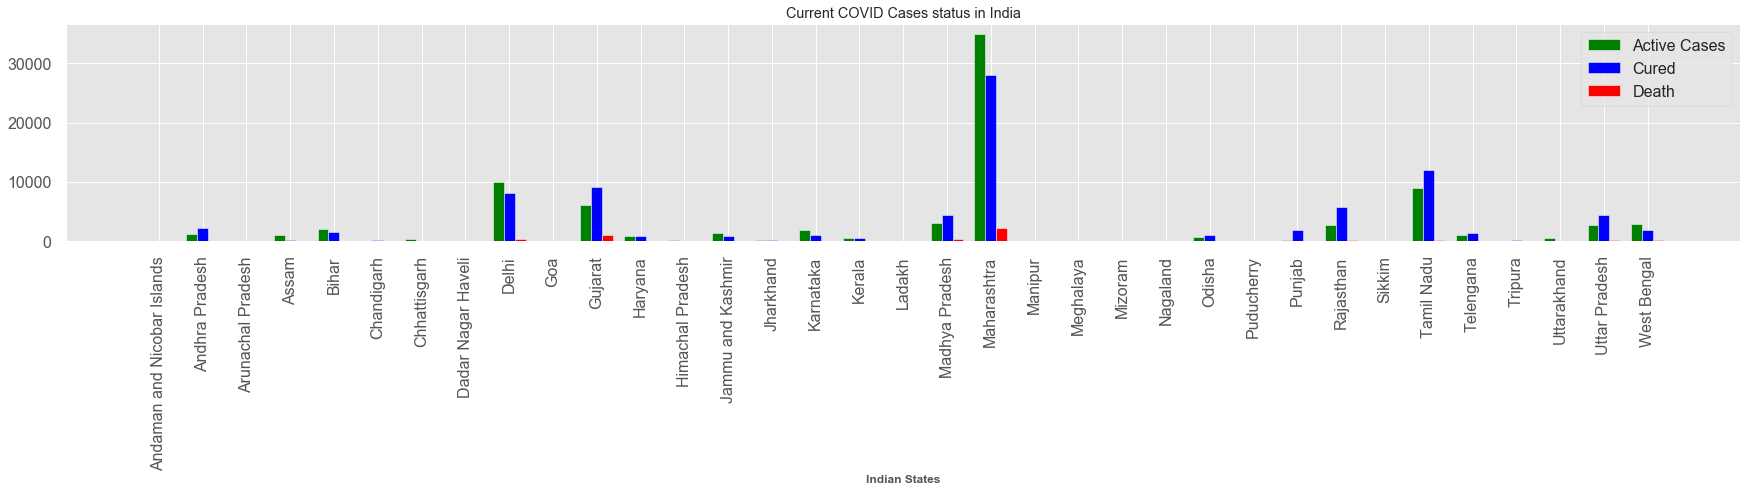

In [119]:
barWidth = 0.25
plt.figure(figsize=(30,4))
bars1 = df['Active Cases']
bars2 = df.Recovered
bars3 = df.Deceased

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='green', width=barWidth, edgecolor='white', label='Active Cases')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Cured')
plt.bar(r3, bars3, color='red', width=barWidth, edgecolor='white', label='Death')
 
# Add xticks on the middle of the group bars
plt.xlabel('Indian States', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], df.index.values)
 
# Create legend & Show graphic
plt.title('Current COVID Cases status in India')
plt.xticks(rotation='vertical')
plt.grid(True)
plt.legend()
plt.show()



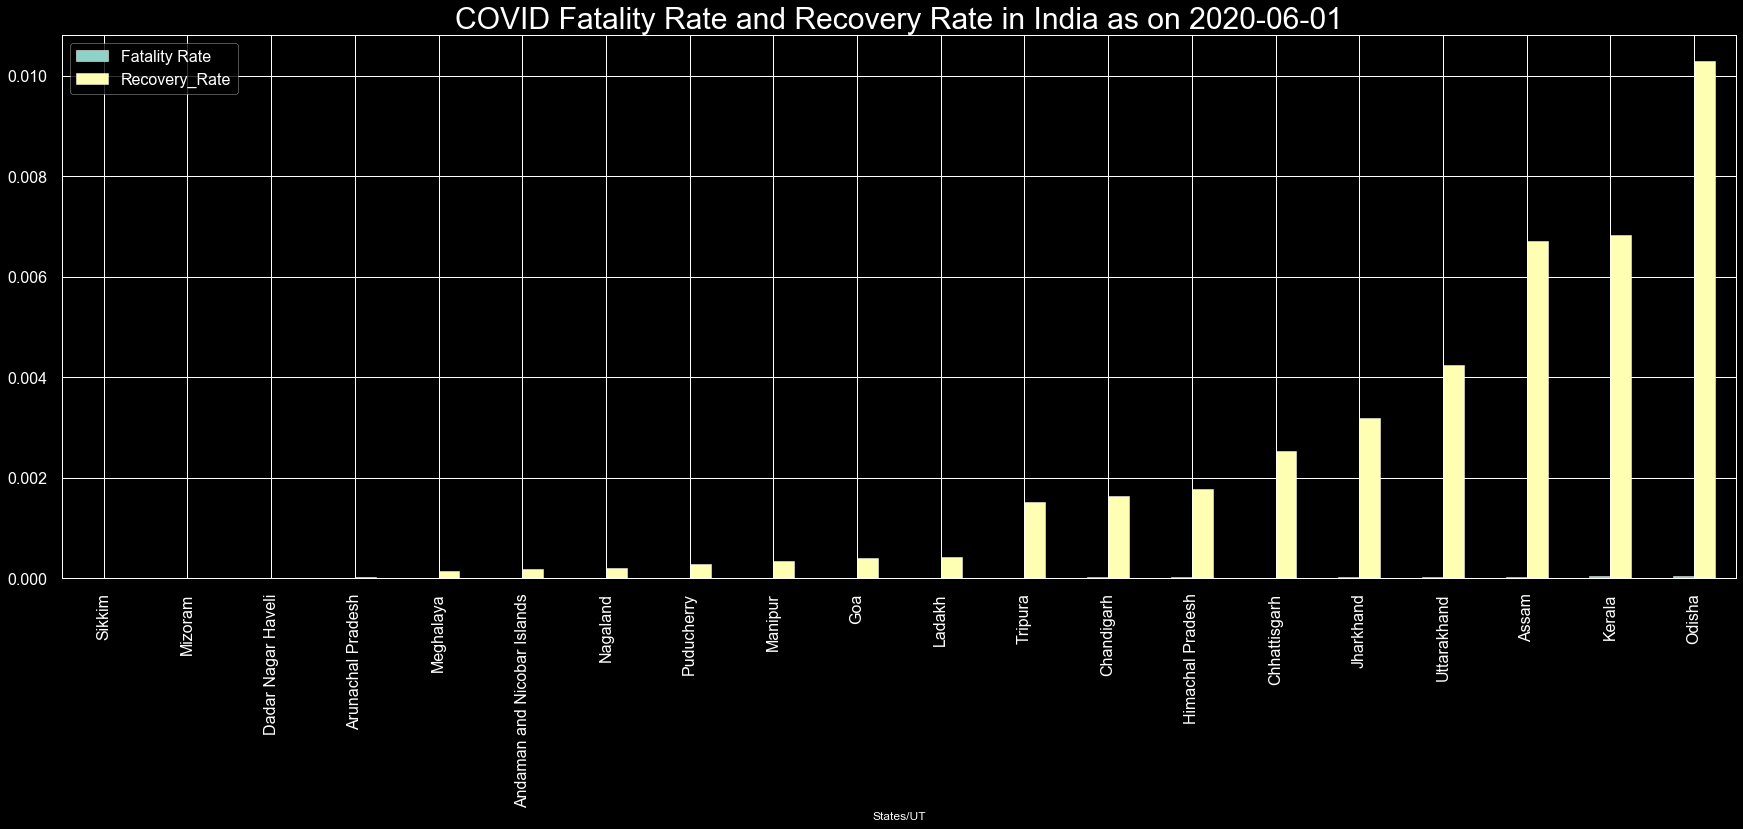

In [120]:
plt.style.use('dark_background')
df_Fatality.sort_values(by = 'Recovery_Rate')[:20].plot(kind='bar',figsize=(30,10))
plt.grid(True)
plt.title(f'COVID Fatality Rate and Recovery Rate in India as on {datetime.date.today()}',fontsize=30)
plt.show()

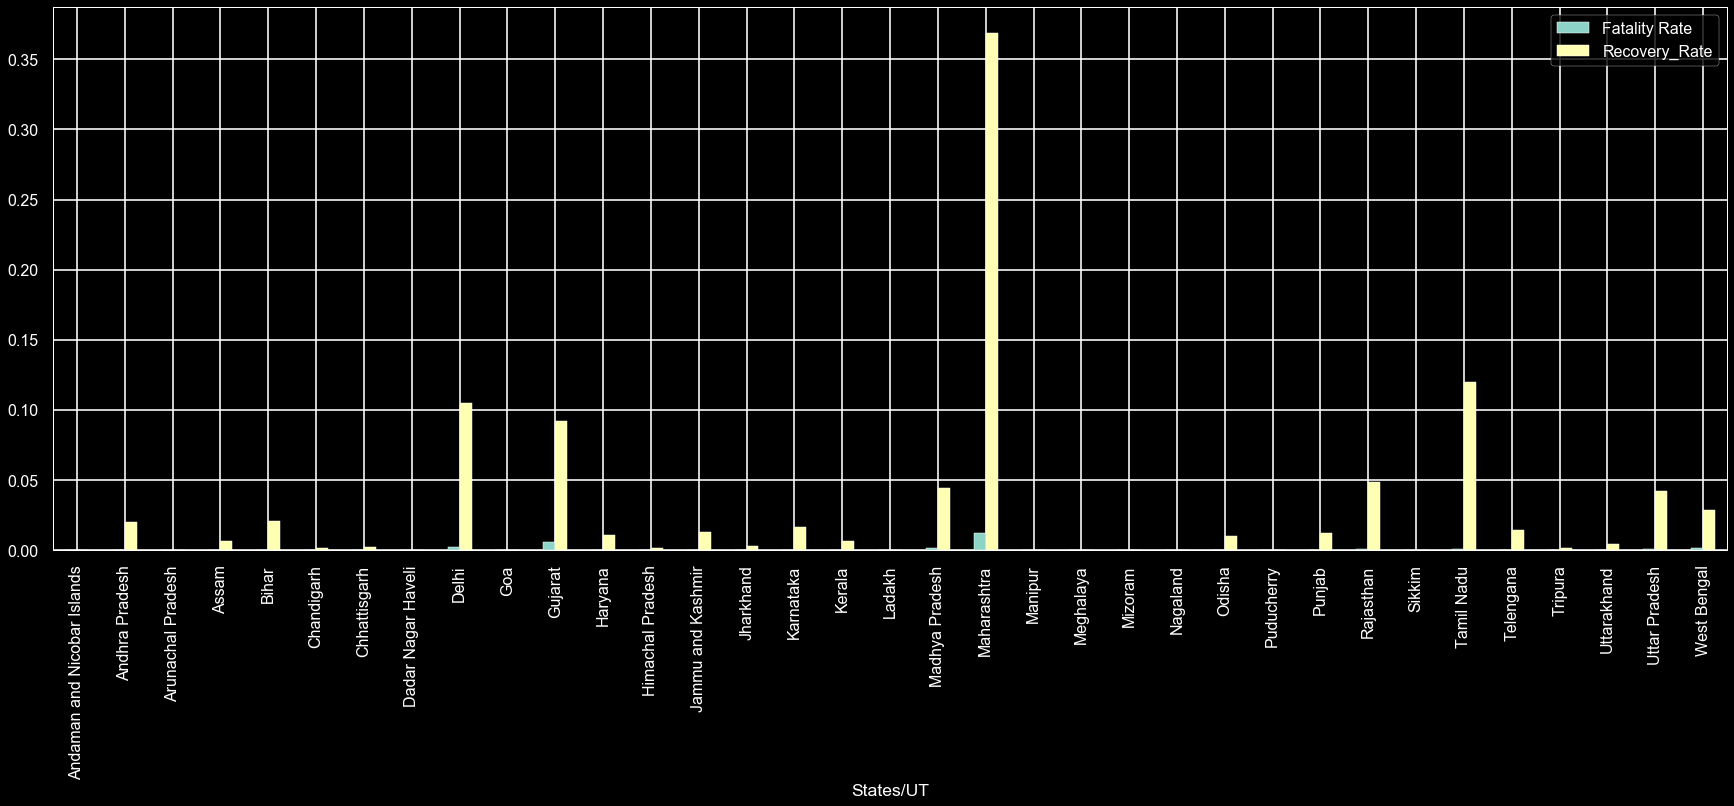

In [121]:
plt.style.use('seaborn-poster')
df_Fatality.plot(kind='bar',figsize=(30,10))
plt.grid(True)
plt.show()

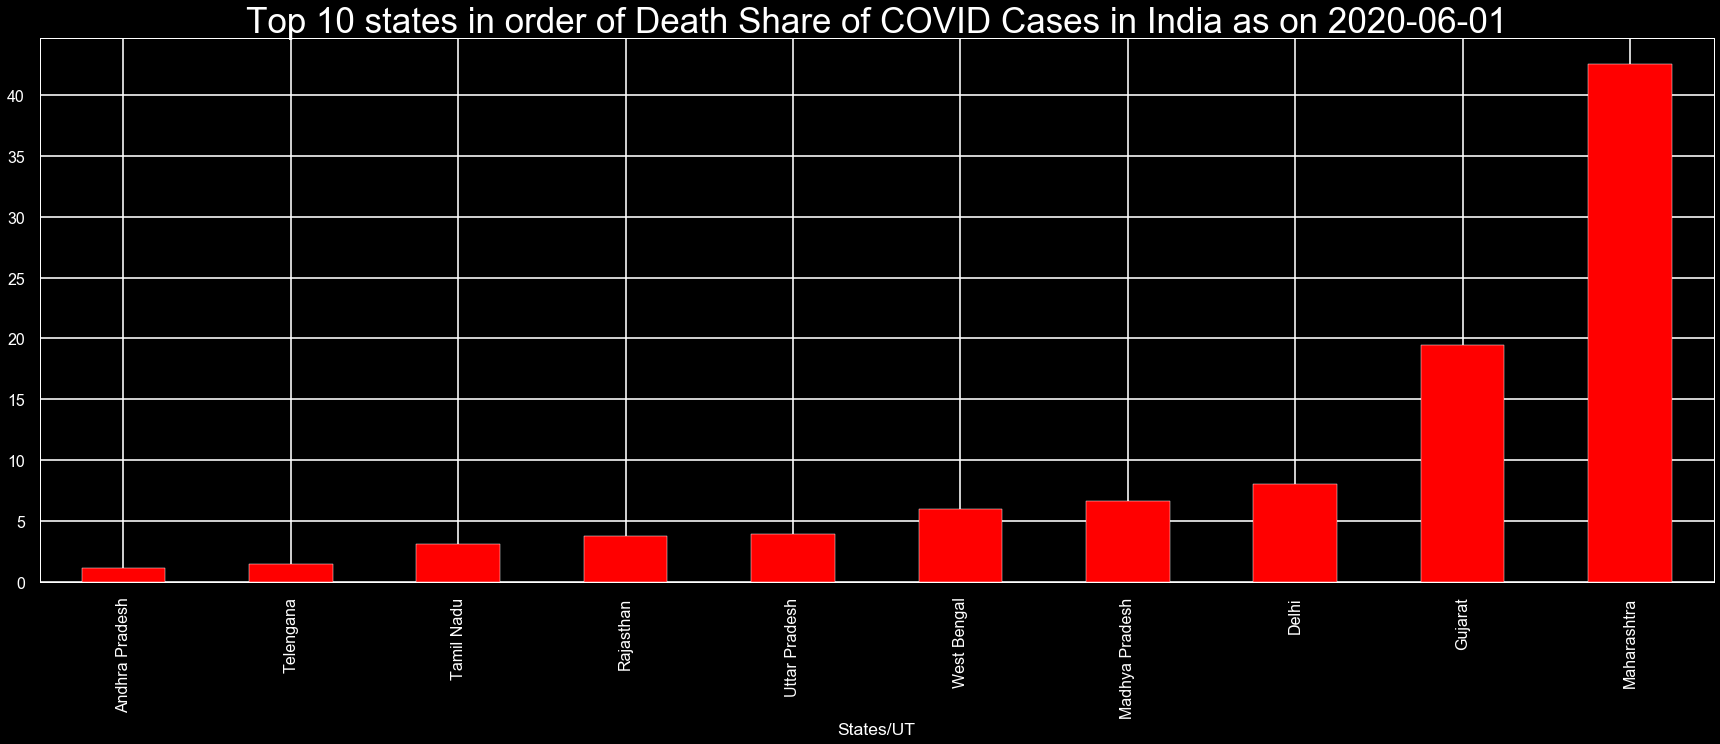

In [122]:
df['Death Share'].apply(lambda x:x*100).sort_values()[-10:].plot(kind='bar',figsize=(30,10),color='red')
plt.grid(True)
plt.title(f'Top 10 states in order of Death Share of COVID Cases in India as on {datetime.date.today()}',fontsize=35)
plt.show()

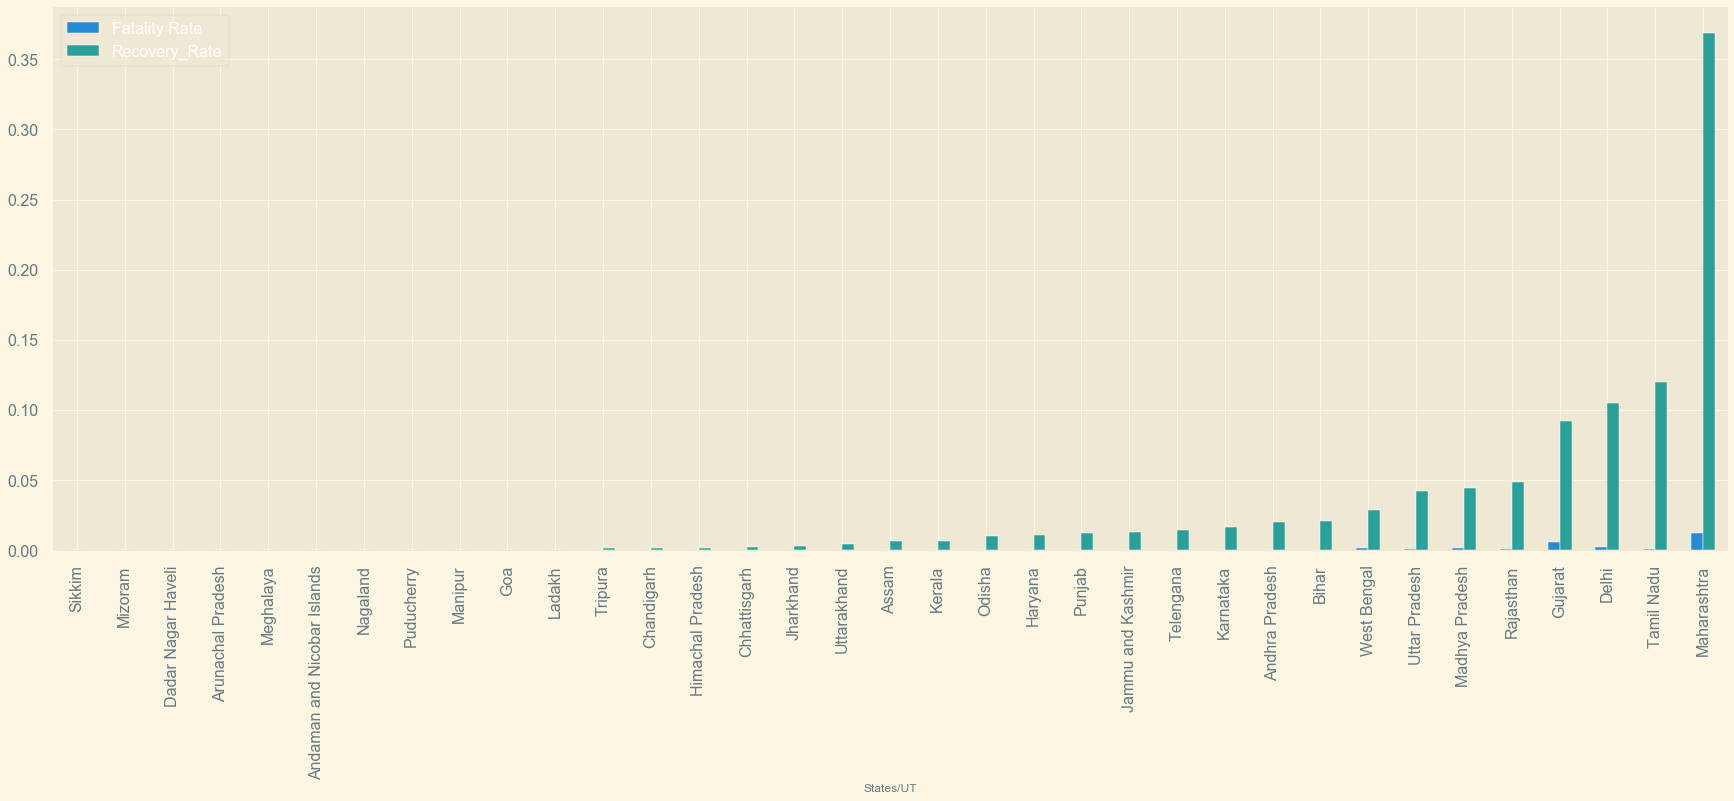

In [123]:
plt.style.use('Solarize_Light2')
df_Fatality.sort_values(by='Recovery_Rate').plot(kind='bar',figsize=(30,10))
plt.grid(True)
plt.show()

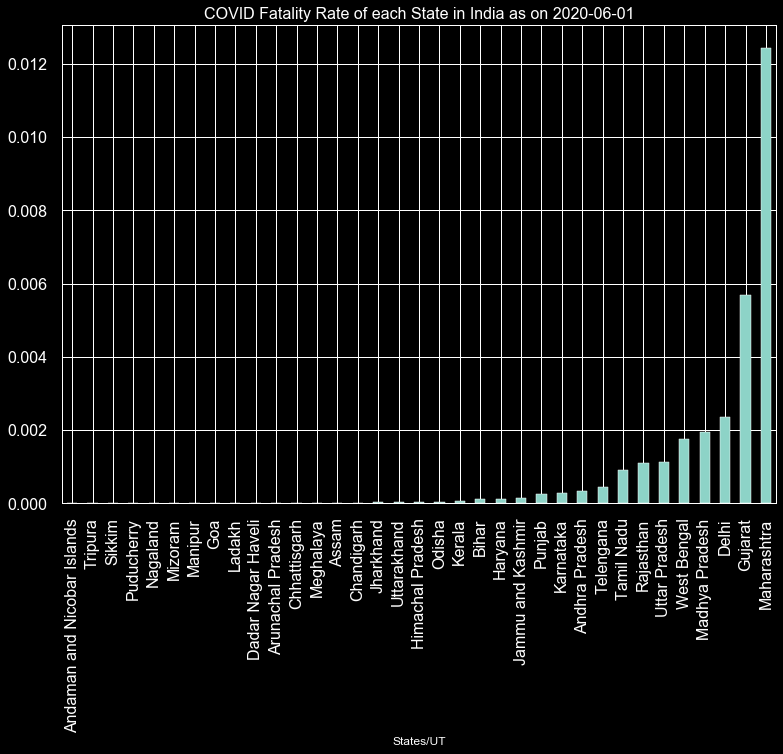

In [124]:
import datetime
with plt.style.context('dark_background'):
    df_Fatality['Fatality Rate'].sort_values().plot(kind='bar')
    plt.title(f'COVID Fatality Rate of each State in India as on {datetime.date.today()}')
plt.show()


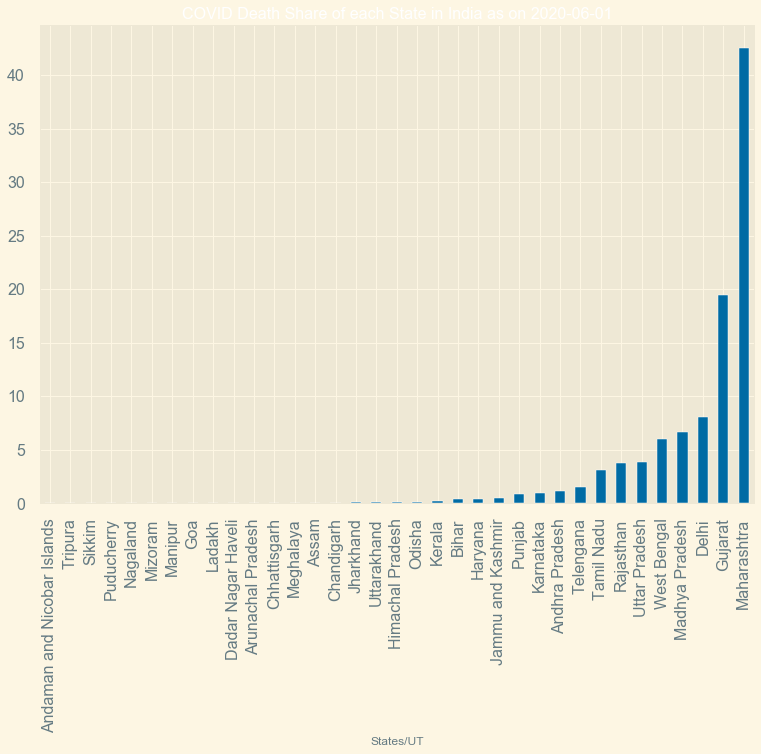

In [125]:
import datetime
with plt.style.context('tableau-colorblind10'):
    df['Death Share'].sort_values().apply(lambda x:x*100).plot(kind='bar')
    plt.title(f'COVID Death Share of each State in India as on {datetime.date.today()}')
plt.show()



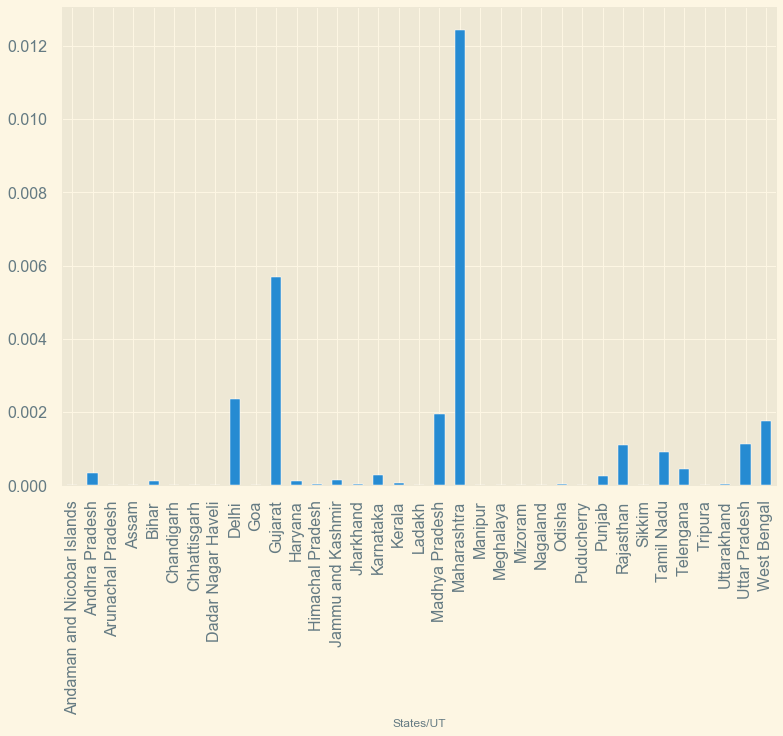

In [126]:
df_Fatality['Fatality Rate'].plot(kind='bar')
plt.show()

# Seaborn

In [129]:
df.head()

,Active Cases,Recovered,Deceased,Confirmed,Recovery_Rate,Fatality Rate,Death Share
States/UT,,,,,,,
Andaman and Nicobar Islands,0,33,0,33,0.000187,0.000000,0.000000
Andhra Pradesh,1220,2289,60,3569,0.020204,0.000340,0.011619
Arunachal Pradesh,3,1,0,4,0.000023,0.000000,0.000000
Assam,1018,163,4,1185,0.006708,0.000023,0.000775
Bihar,1998,1618,20,3636,0.020583,0.000113,0.003873


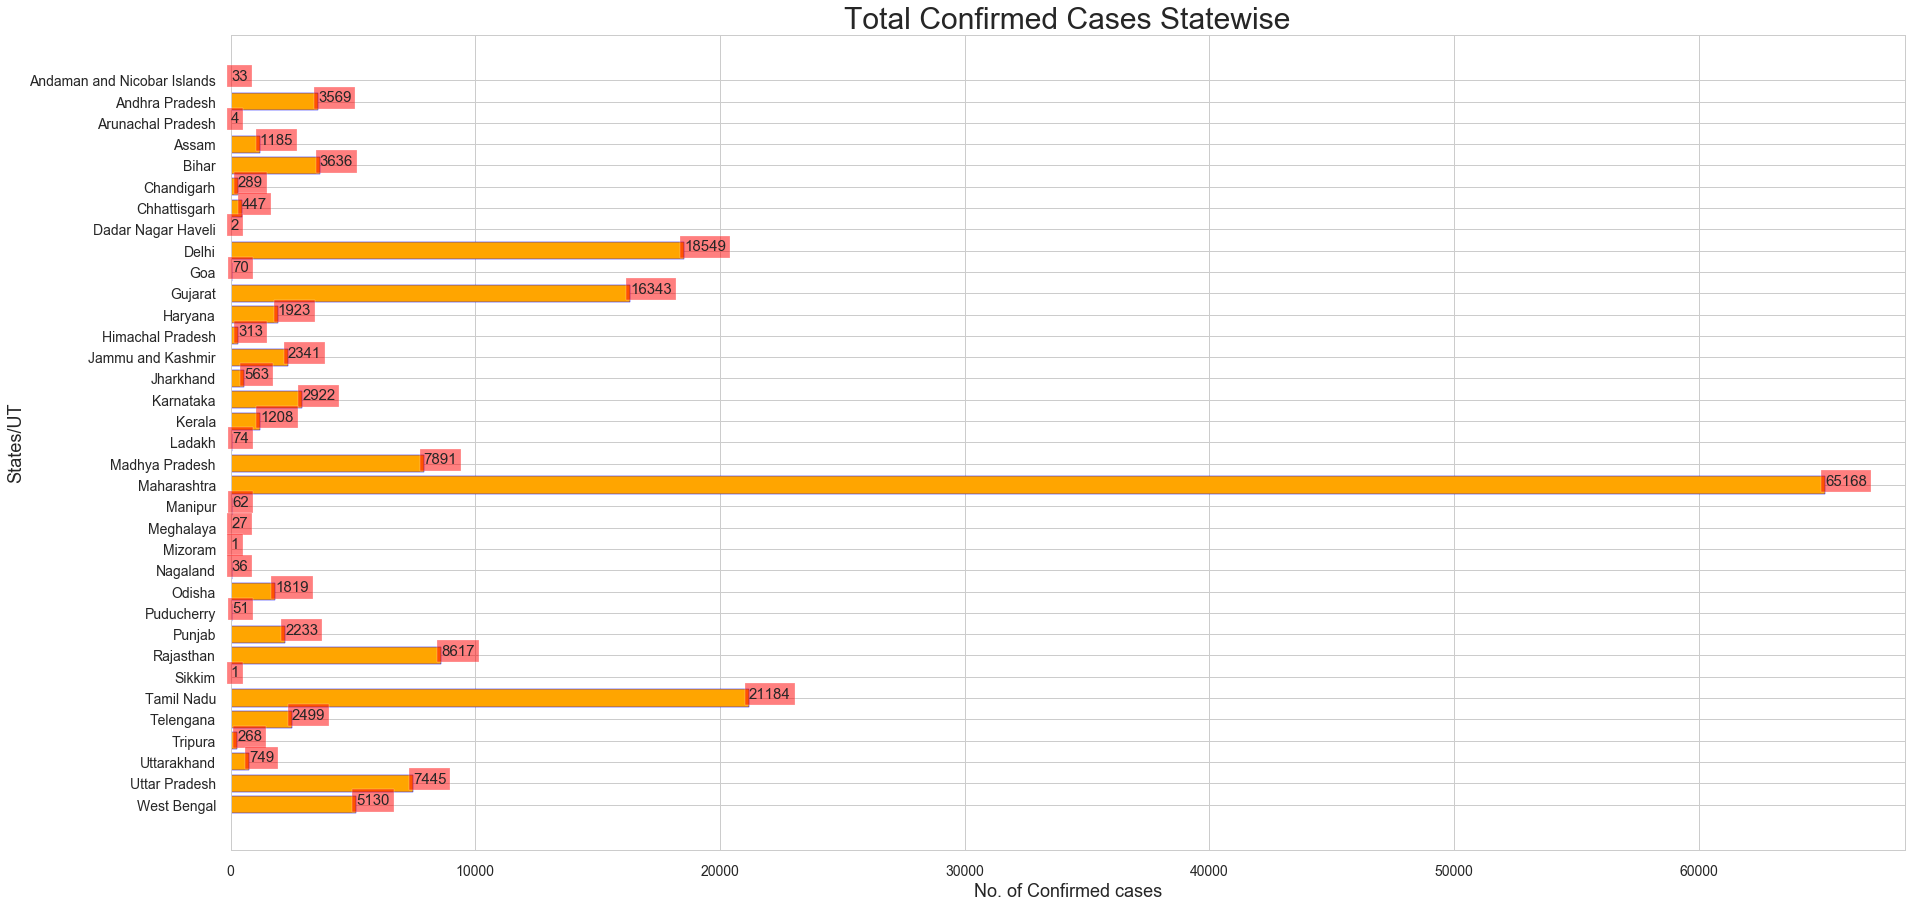

In [130]:
sns.set_style("whitegrid")
plt.figure(figsize = (30,15))
plt.barh(state_data.index, state_data['Confirmed'],align = 'center',
                    color = 'orange', edgecolor = 'blue')
plt.xlabel('No. of Confirmed cases', fontsize = 18)
plt.ylabel('States/UT', fontsize = 18)
plt.gca().invert_yaxis()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Total Confirmed Cases Statewise', fontsize =30 )
for index, value in enumerate(state_data['Confirmed']):
    plt.text(value, index, str(value), fontsize = 15,bbox=dict(facecolor='red', alpha=0.5))
plt.show()

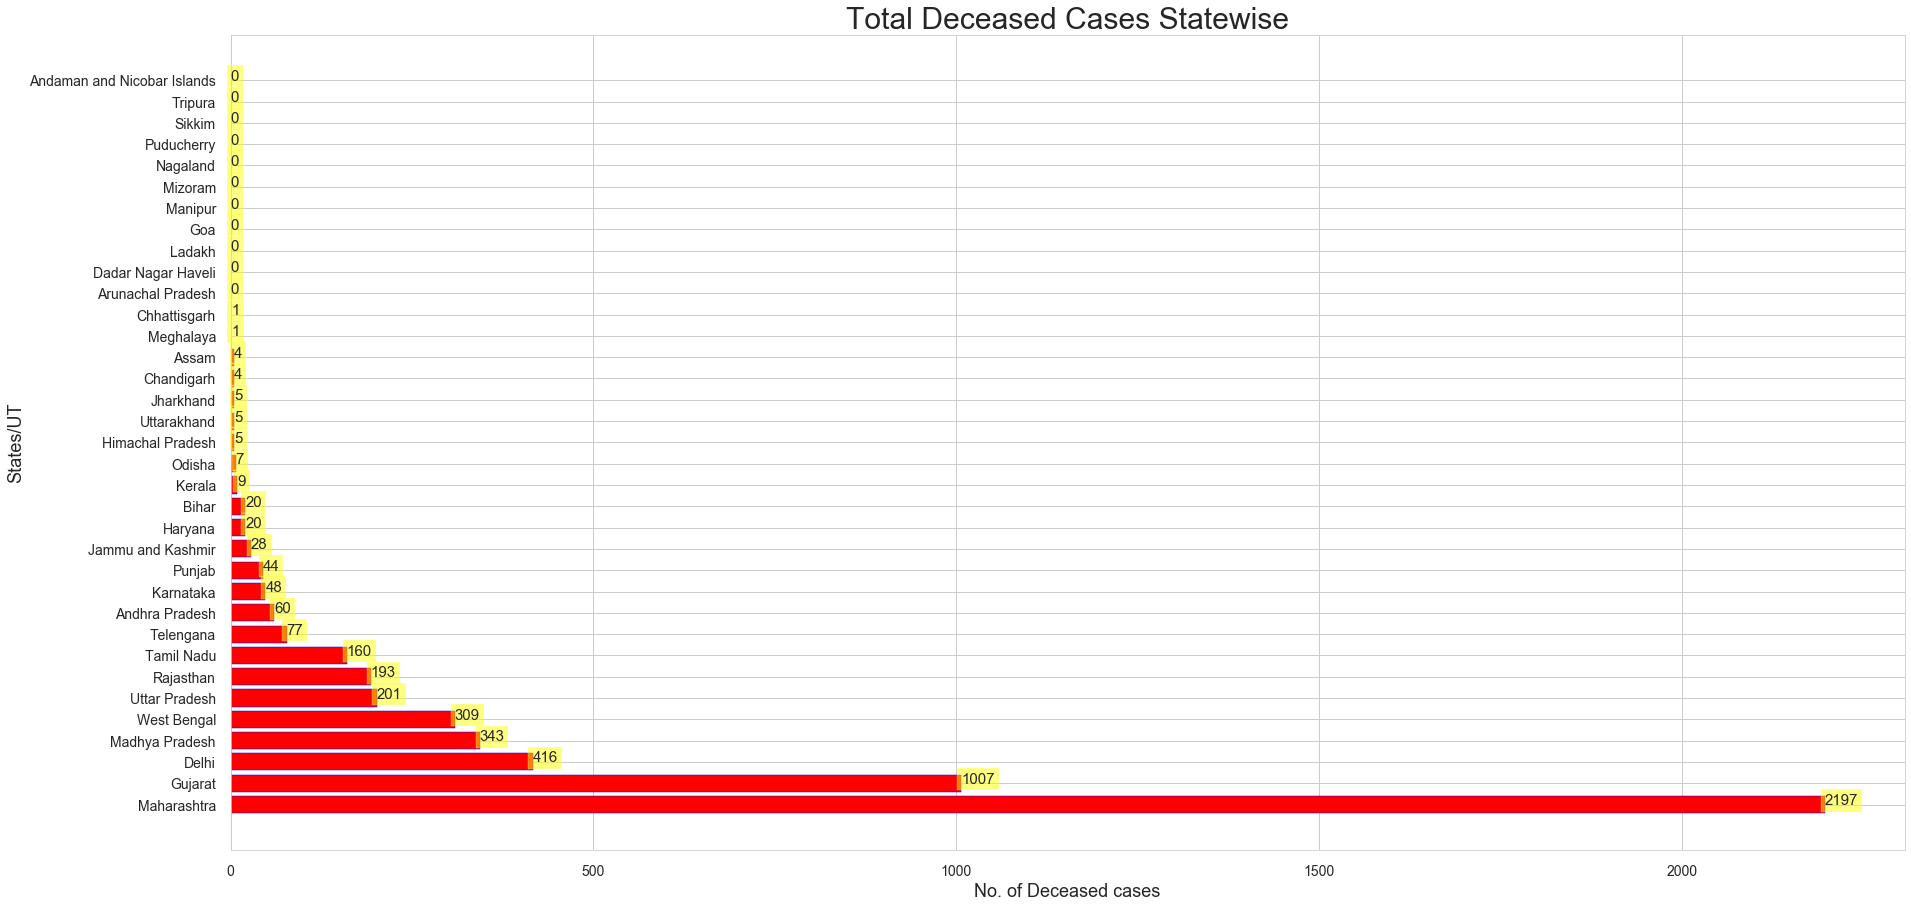

In [87]:
sns.set_style("whitegrid")
plt.figure(figsize = (30,15))
plt.barh(state_data.sort_values(by='Deceased')['States/UT'], state_data['Deceased'].sort_values(),align = 'center',
                    color = 'red', edgecolor = 'blue')
plt.xlabel('No. of Deceased cases', fontsize = 18)
plt.ylabel('States/UT', fontsize = 18)
plt.gca().invert_yaxis()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Total Deceased Cases Statewise', fontsize =30 )
for index, value in enumerate(state_data['Deceased'].sort_values()):
    plt.text(value, index, str(value), fontsize = 15,bbox=dict(facecolor='yellow', alpha=0.5))
#plt.savefig('Total Deceased Cases in INDIA - 14 May 2020')
plt.show()

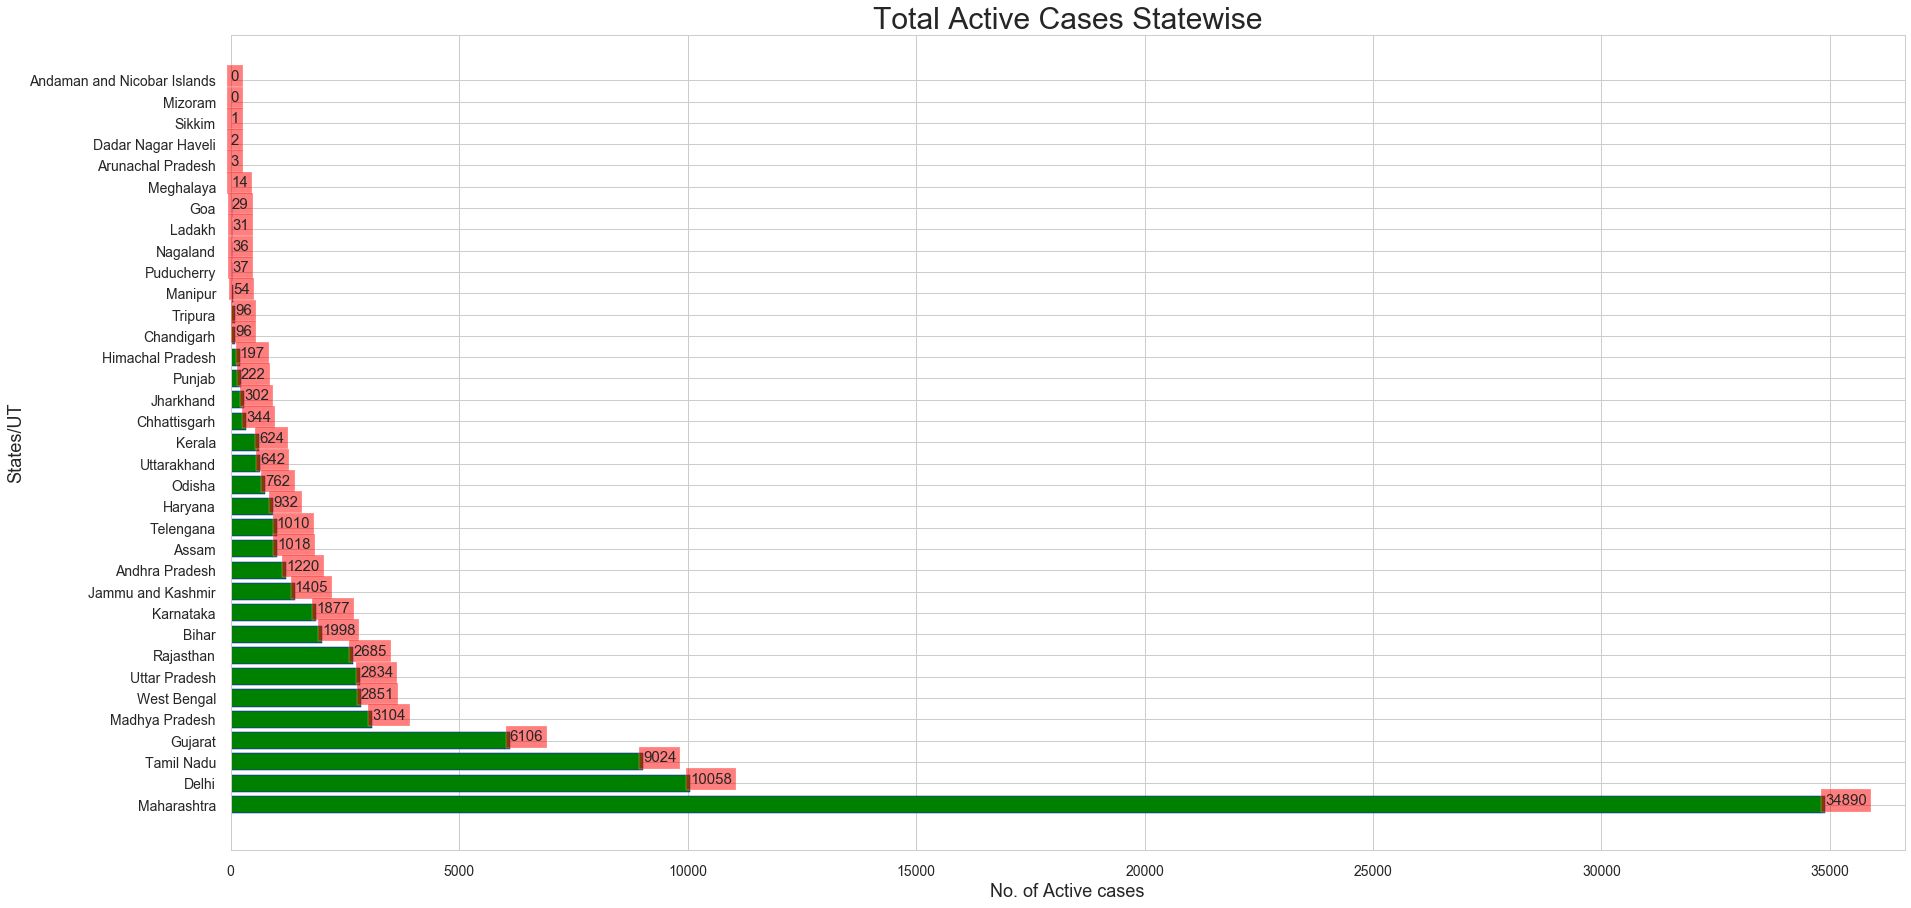

In [131]:
sns.set_style("whitegrid")
plt.figure(figsize = (30,15))
plt.barh(df.sort_values(by='Active Cases').index, df['Active Cases'].sort_values(),align = 'center',
                    color = 'green', edgecolor = 'blue')
plt.xlabel('No. of Active cases', fontsize = 18)
plt.ylabel('States/UT', fontsize = 18)
plt.gca().invert_yaxis()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Total Active Cases Statewise', fontsize =30 )
for index, value in enumerate(df['Active Cases'].sort_values()):
    plt.text(value, index, str(value), fontsize = 15,bbox=dict(facecolor='red', alpha=0.5))
plt.show()

# Donut Chart — Nationwide total Confirmed, Recovered and Deceased cases

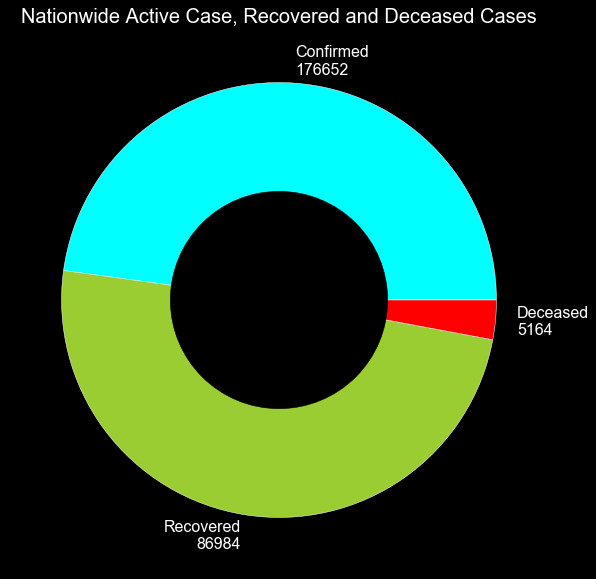

In [132]:
with plt.style.context('dark_background'):
    group_size = [sum(df['Active Cases']),
                  sum(df['Recovered']),
                  sum(df['Deceased'])]
    group_labels = ['Confirmed\n' + str(sum(df['Confirmed'])),
                    'Recovered\n' + str(sum(df['Recovered'])),
                    'Deceased\n' + str(sum(df['Deceased']))]
    custom_colors = ['cyan','yellowgreen','red']
    plt.figure(figsize = (10,10))
    plt.pie(group_size, labels = group_labels, colors = custom_colors)
    central_circle = plt.Circle((0,0), 0.5, color = 'black')
    fig = plt.gcf()
    fig.gca().add_artist(central_circle)
    plt.rc('font', size = 12)
    plt.title('Nationwide Active Case, Recovered and Deceased Cases', fontsize = 20)
plt.show()

# Pie Chart

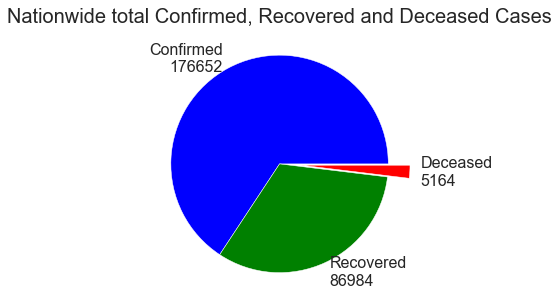

In [133]:
group_size = [sum(state_data['Confirmed']),
                  sum(state_data['Recovered']),
                  sum(state_data['Deceased'])]
group_labels = ['Confirmed\n' + str(sum(state_data['Confirmed'])),
                    'Recovered\n' + str(sum(state_data['Recovered'])),
                    'Deceased\n' + str(sum(state_data['Deceased']))]
custom_colors = ['blue','green','red']
plt.figure(figsize = (5,5))
plt.pie(group_size, labels = group_labels, colors = custom_colors,explode=[0,0,0.2])
plt.rc('font', size = 15)
plt.title('Nationwide total Confirmed, Recovered and Deceased Cases', fontsize = 20)
plt.show()

# Plotly Pie Charts

In [137]:
state_data1 = pd.DataFrame(state_data)
state_data1.drop(columns=['Sr.No'],inplace=True)

In [139]:
state_data1

,Active Cases,Recovered,Deceased,Confirmed
States/UT,,,,
Andaman and Nicobar Islands,0,33,0,33
Andhra Pradesh,1220,2289,60,3569
Arunachal Pradesh,3,1,0,4
Assam,1018,163,4,1185
Bihar,1998,1618,20,3636
Chandigarh,96,189,4,289
Chhattisgarh,344,102,1,447
Dadar Nagar Haveli,2,0,0,2
Delhi,10058,8075,416,18549


In [140]:
state_data.columns

Index(['Sr.No', 'Active Cases', 'Recovered', 'Deceased', 'Confirmed'], dtype='object')

In [141]:
#https://plotly.com/python/pie-charts/
import plotly.express as px
fig = px.pie(state_data1, values='Confirmed', names=state_data.index, title=f'Statewise Confirmed Cases in India as on {datetime.date.today()}',
             color_discrete_sequence=px.colors.sequential.RdBu,
            hover_data=['Recovered'], labels={'Recovered':'Recovered'})
fig.update_traces(textposition='inside', textinfo='percent+label')
s=str(datetime.datetime.now())+' Plotly_India_Confirmed_pie.html'
fig.write_html(s)
fig.show()

# Bubble Charts

# Pyplot

In [142]:
fig = go.Figure(data=[go.Scatter(
    x=df['Confirmed'], y=df['Deceased'],
    mode='markers',
    marker_size=df['Recovery_Rate']*100)
])
fig.show()

In [98]:
fig = px.scatter(x=df['Confirmed'], y=df['Deceased'],size=df['Recovery_Rate']*100,
                 color=df.index,
                 hover_name=df.index, log_x=True, size_max=60)
fig.show()

# Chloropleth map of the total Confirmed Cases in India

https://map.igismap.com/share-map/export-layer/Indian_States/06409663226af2f3114485aa4e0a23b4

In [144]:
map_data = gpd.read_file('Indian_States.shp')
map_data.rename(columns = {'st_nm':'States/UT'}, inplace = True)

In [145]:
map_data['States/UT'] = map_data['States/UT'].str.replace('&','and')
map_data['States/UT'].replace('Arunanchal Pradesh','Arunachal Pradesh', inplace = True)
map_data['States/UT'].replace('Telangana','Telengana', inplace = True)
map_data['States/UT'].replace('NCT of Delhi', 'Delhi', inplace = True)
map_data['States/UT'].replace('Andaman and Nicobar Island', 'Andaman and Nicobar Islands',inplace = True)

# Merging 

In [148]:
merged_data = pd.merge(map_data, state_data, how = 'left', on = 'States/UT')
merged_data.fillna(0, inplace = True)

In [149]:
merged_data.drop('Sr.No', axis = 1, inplace = True)

# Plotting COVID cases on India Map using GeoPandas

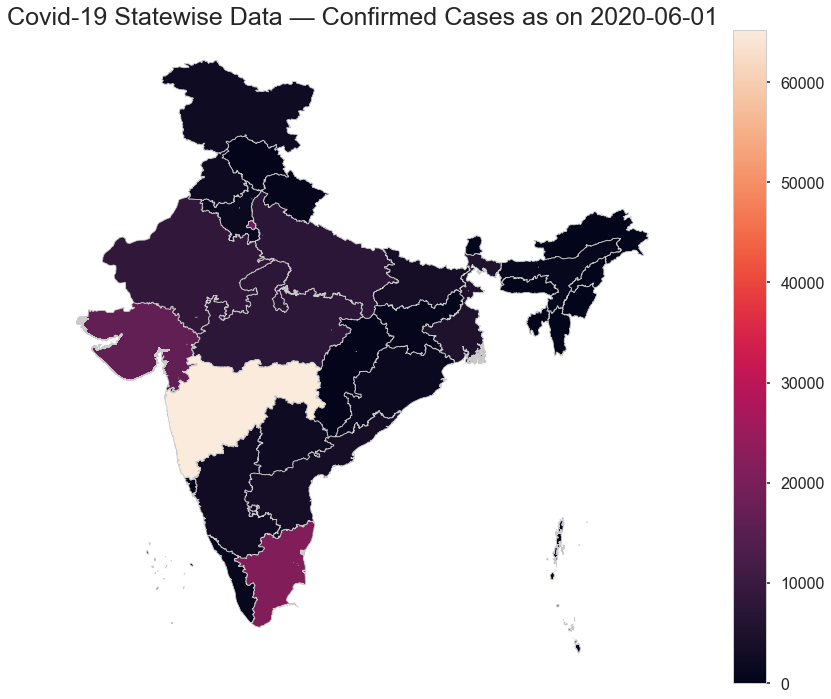

In [152]:
fig, ax = plt.subplots(1, figsize=(20, 12))
ax.axis('off')
ax.set_title(f'Covid-19 Statewise Data — Confirmed Cases as on {datetime.date.today()}', fontdict =  {'fontsize': '25', 'fontweight' : '3'})
merged_data.plot(column = 'Confirmed', linewidth=0.8, ax=ax, edgecolor='1.8', legend = True)
plt.show()